## **Introduction**
 
 *Project Question: How do different levels of development impact a country's progress towards clean energy?*

## Motivation and Problem Statement

This research study is analyzing how different levels of development impact a country's progress towards sustainability, more specifically towards clean energy. The intent of this study is to explore whether developed nations tend to adopt more sustainable practices or whether their high consumption patterns counteract these efforts. As global warming is increasingly impacting our lives and environment more each day, it is important we evaluate how effectively countries are managing their resources and consider ways we can make environmental changes ourselves. This analysis studies the relationship between how sustainability varies across different stages of development, demonstrating whether developed countries are utilizing their resources responsibly or if their consumption patterns have harmful environmental consequences. One of the questions that will be explored is, *are developed countries more likely to have higher percentages of renewable energy consumption compared to developing or underdeveloped countries?*

**Hypothesis**: Countries with higher GDP levels and greater development will show a positive correlation with higher renewable energy consumption.  

## Related Work

Previous research have also explored the relationship between economic development and environment impacts. The Environment Kuznet Curve suggests that pollution rises in early stages of development, then falls as economies mature and prioritize environmental protection. Their hypothesis creates an inverted U-shaped trend, where as a country first develops economically, environmental degradation increases with the rising income, but it reaches a turning point and begins to decrease, creating an inverted U-shaped relationship between economic growth and environmental quality. From this information, I want to explore further in depth and explore how countries at different stages of development manage their energy consumption and environmental impacts. I want to specifically investigate whether more developed countries, which should theoretically have the resources and policies to promote sustainability, are truly adopting renewable energy practices or whether their high energy consumption patterns hinder environmental progress. 

**Resources**

- Environment Kuznet Curve: https://www.sciencedirect.com/topics/social-sciences/environmental-kuznets 

## **Methodology**

### Data Collected

One of the datasets that was used for the analysis comes from the World Development Indicators (WDI) - World Bank site. From this site, there are various datasets that can be obtained from the World Bank. It includes a comprehensive set of series across many countries that can determine the development of a country. The set of series covers data on GDP, Human Development Index (HDI), poverty levels, literacy rates, and access to resources. This site provides quantitative data into the economic and social development levels of numerous countries. For this analysis, the Gross Domestic Product (current US$) data sets was used and compared amongst different countries to determine their development levels. Then, this dataset was used to find any correlations with the renewable energy consumption of countries. However, it is also important to note that some data may be outdated, missing, or inaccurate - particularly for low-income countries where reporting capabilities may be limited. This could potentially lead to skewed or mislearning conclusions about a country’s development or sustainable practices. 

- **Link to Data:** https://databank.worldbank.org/source/world-development-indicators

- **Licensed:** under CC BY 4.0.

Another data set that was used is the World Bank - Sustainable Energy for All (SE4ALL) Database. This dataset offers series related to energy access, renewable energy, and energy efficiency across countries. It includes data on renewable energy consumption, electricity access, and clean fuel use. The Renewable Energy Consumption and Total Final Energy consumption datasets were used to compare the amount of renewable energy usage across countries. From doing this comparison, the relationship between levels of country development and clean energy usage were analyzed. With this dataset, investigation of whether developed countries are adopting more clean energy solutions or if their high consumption rates are creating more harm to the environment were explored. Similar to the WDI dataset, SE4ALL data may be limited for certain countries, especially those with lower income or underdeveloped energy infrastructure.

- **Link to Data:** https://databank.worldbank.org/source/sustainable-energy-for-all

- **License:** under CC BY 4.0.

### Data Cleaning

The GDP (current $) dataset includes data for 217 countries, while the clean energy consumption dataset contains data for 230 countries. Both datasets also had some missing, or values that cannot be used. Before beginning any data coding or analysis, it is essential to clean and the datasets to ensure alignment. In this section, I will outline the steps I took to clean and harmonize these datasets, ensuring they are compatible for accurate analysis and meaningful insights.

To clean the data using codes, I loaded the datasets and stripped any white spaces and converted all letters to lower case. This ensured that both datasets have a consistent format, which is important for data merging and comparison for later on. 

In [3]:
import pandas as pd

# Load the datasets
gdp_data = pd.read_csv('GDP2015_currentUS_WDI.csv')  # Replace with your original GDP file path
energy_data = pd.read_csv('cleanenergyconsumption2015_data.csv')  # Replace with your original energy file path


# Clean the 'Country' column to match
gdp_data['Country'] = gdp_data['Country Name'].str.strip().str.lower()
energy_data['Country'] = energy_data['Country Name'].str.strip().str.lower()

Next, I removed of duplicates in each data set and any entries that are invalid in the GDP and clean energy data sets. Invalid data from clean energy data consisted of rows where both TFEC and Renewable Energy Consumption are 0 in the clean energy data set. Invalid data from GDP data set consists of GDP that do not exist, or not numerical. Duplicates and invalid data removal are essential in ensuring that both data sets are consistent and aligned. 

In [4]:
# Remove duplicates
gdp_data = gdp_data.drop_duplicates()
energy_data = energy_data.drop_duplicates()

# Ensure GDP column does not contain invalid entries
gdp_data['GDP (current US$) [NY.GDP.MKTP.CD]'] = gdp_data['GDP (current US$) [NY.GDP.MKTP.CD]'].astype(str)
gdp_data['GDP (current US$) [NY.GDP.MKTP.CD]'] = gdp_data['GDP (current US$) [NY.GDP.MKTP.CD]'].replace(['...', '..'], pd.NA)
gdp_data['GDP (current US$) [NY.GDP.MKTP.CD]'] = pd.to_numeric(gdp_data['GDP (current US$) [NY.GDP.MKTP.CD]'], errors='coerce')
gdp_data_cleaned = gdp_data.dropna(subset=['GDP (current US$) [NY.GDP.MKTP.CD]'])

# Remove rows where both TFEC and Renewable Energy Consumption are 0
energy_data_cleaned = energy_data[
    ~((energy_data['Total final energy consumption (TFEC) '] == 0) & 
      (energy_data['Renewable energy consumption'] == 0))
]


Filtering the data sets to include only countries that are present in the GDP and clean energy data are also conducted, especially after cleaning up both data sets. This was the last step of cleaning up both data sets before merging and saving the cleaned data sets into different files. Doing this ensures that both data sets to not only have the same countries, but also to have the same quantity of countries. 

In [5]:
# Filter to common countries
common_countries = set(gdp_data_cleaned['Country']).intersection(energy_data_cleaned['Country'])
gdp_data_final = gdp_data_cleaned[gdp_data_cleaned['Country'].isin(common_countries)]
energy_data_final = energy_data_cleaned[energy_data_cleaned['Country'].isin(common_countries)]

To complete my data cleaning, I merged both cleaned datasets code into one file, and saved the cleaned data sets and merged set into different files. 

In [6]:
# Merge datasets
merged_data = pd.merge(gdp_data_final, energy_data_final, on='Country')

# Save the cleaned datasets
gdp_data_final.to_csv('updated_gdp_data.csv', index=False)
energy_data_final.to_csv('updated_energy_data.csv', index=False)


# Save the cleaned merged dataset
merged_data.to_csv('merged_data.csv', index=False)

print("Cleaned and merged datasets have been saved to new CSV files.")

Cleaned and merged datasets have been saved to new CSV files.


In [7]:
# Print the number of rows (countries) in both datasets
print(f"Number of countries in updated GDP data: {gdp_data_final.shape[0]}")
print(f"Number of countries in updated clean energy data: {energy_data_final.shape[0]}")

Number of countries in updated GDP data: 202
Number of countries in updated clean energy data: 202


Now, both the cleaned GDP and clean energy data sets have the same quantity of data (202) and the same countries. Cleaning the datasets removed any duplicates and invalid data that may result in inaccurate analysis and comparison conflictions. 

### Data Coding

#### Number Country Code

After cleaning up my data, I directly coded my data. This allowed me to transform categorical variables, such as country names, into a numberical format so that both datasets can be easy to analyzed and compared. By assigning numerical codes to each country, it is more efficient to link and organize different datasets. This enabled higher accuracy and consistency of the analysis throughout my research. Coding operations, such as sorting, ranking, and merging data sets were conducted to break down my data into numerical formatting.  

I begun by numbering each country in ascending order, starting at the very top of the merged data file, from  number 1. To store this data for reference, I saved the new country code into a new file named 'code_country_data'.

In [8]:
# Create a new column 'Number Country Code' with ascending numbers starting from 1
merged_data['Number Country Code'] = range(1, len(merged_data) + 1)

# Create a new DataFrame with 'Country Name' and 'Number Country Code'
country_code_data = merged_data[['Country', 'Number Country Code']].copy()

# Save the new country code data to a CSV file
country_code_data.to_csv('code_country_data.csv', index=False)

print("Country code data has been saved to 'code_country_data.csv'.")

Country code data has been saved to 'code_country_data.csv'.


In my next step, I merged all relevant variables into a final file, and created a GDP ranking. The GDP data is sorted in ascending order, with the GDP rank assigned based on the smallest GDP value, starting from 1. The final dataset includes four columns: the number country code, GDP value, total renewable energy percentage, and GDP rank. The number country code refers to the unique code assigned to each country in the code_country_data file, making it easier to reference countries without spelling out their full names. The GDP rank corresponds to the country's GDP, and the total renewable energy percentage is linked to the respective country. This structure enables a clear comparison between GDP and clean energy progress, facilitating the creation of scatter plots for visual analysis to identify emerging trends between GDP (as a measure of country development) and progress toward clean energy adoption.

#### GDP Ranking

I first load the code_country_data file, which contains the country codes that I need. Then, I merged the GDP and clean energy datasets with this country code data based on the common 'Country' column, creating a unified dataset with all relevant information. This ensured that each country is properly linked to its GDP, energy consumption data, and corresponding country code.

In [9]:
import pandas as pd

# Load the code_country_data file which contains the Number Country Code
country_code_data = pd.read_csv('code_country_data.csv')  # Adjust the path as necessary

# Merge the datasets on 'Country'
merged_data = pd.merge(gdp_data_final, energy_data_final, on='Country')

# Merge the country code data with the merged data
merged_data_with_codes = pd.merge(merged_data, country_code_data, on='Country')

Next, I merged dataset by GDP in ascending order, ensuring that the country with the smallest GDP comes first. I then added a new column named, 'GDP Rank', where each country is assigned a rank starting from 1 for the smallest GDP, and the rank increases in order of GDP value.

In [10]:
# Sort the data by GDP in ascending order (smallest GDP first)
merged_data_sorted = merged_data_with_codes.sort_values(by='GDP (current US$) [NY.GDP.MKTP.CD]', ascending=True)

# Add a 'GDP Rank' column, where 1 is the smallest GDP
merged_data_sorted['GDP Rank'] = range(1, len(merged_data_sorted) + 1)

For my last step in data coding, I made sure to include all relevant columns for analyzing and comparsion. These columns include:
- Number Country Code
- GDP (current US$) [NY.GDP.MKTP.CD]
- Total Renewable Energy Percentage
- GDP Rank

And I saved all my final data and coding into a new file named, 'final_country_data_with_co

In [11]:
# Select the relevant columns
final_data = merged_data_sorted[['Number Country Code', 'GDP (current US$) [NY.GDP.MKTP.CD]', 'Total Renewable Energy Percentage', 'GDP Rank']]

# Save the final data to a new CSV file
final_data.to_csv('final_country_data_with_codes.csv', index=False)

print("The new CSV file with the required data has been saved as 'final_country_data_with_codes.csv'.")


The new CSV file with the required data has been saved as 'final_country_data_with_codes.csv'.


### Data Analysis

To analyze both datasets, a correlation and comparison analysis was conducted to explore the relationships between Country Development (measured by GDP) and the Total Percentage of Renewable Energy Consumption across each country and the various levels of development. The Total Percentage of Renewable Energy Consumption was calculated for each country by dividing the Renewable Energy Consumption by the Total Final Energy Consumption. Identifying the relationships between these two data sets allowed observations of emerging trends. 

Driven by the datasets, a scatter plot was generated to illustrate the visual relationship between the GDP of a country and their Percentage of Renewable Energy Consumption. The independent variable (x-axis) represented the GDP ranking, which in this case represents the economic development of a country (1 being the lowest economic development). The dependent variable (y-axis) represented the Total Percentage of Renewable Energy Consumption. This variable represents how much energy is coming from renewable sources in a country. The visualization of this scatter plot allows the audience to see the trends and correlations between the development levels of a country and their renewable energy consumption.

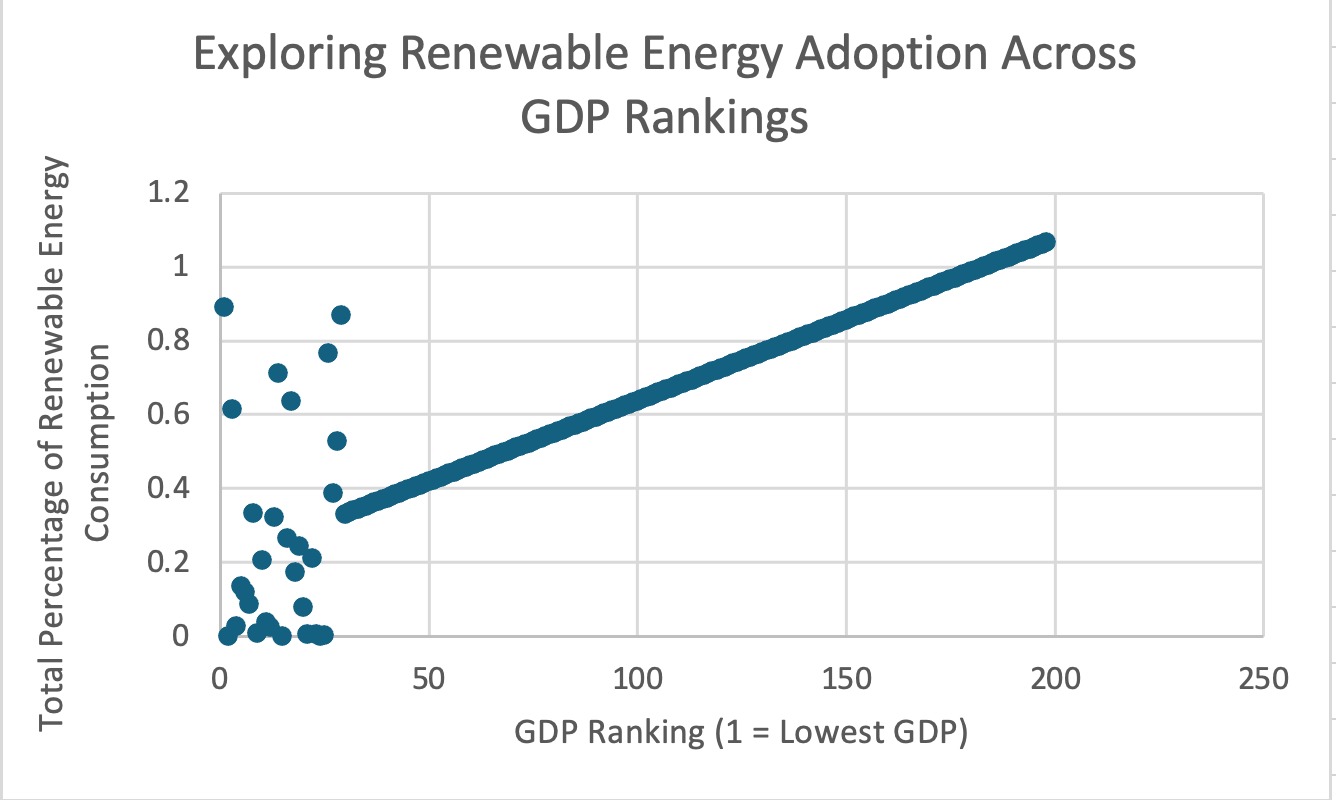

## **Findings**

The scatter plot visualization reveals a clear positive correlation between a country's GDP ranking and its Total Percentage of Renewable Energy Consumption. As the GDP rank increases, indicating higher levels of economic development, there is a noticeable increase in the percentage of energy consumed from renewable sources. This suggests that wealthier, more developed countries tend to practice and invest more in sustainable energy practices. The linearity of the plot, with many data points closely aligned along the trend line, strengthens the conclusion that there is a consistent relationship between a country's economic development and its progress towards adopting renewable energy. This pattern highlights the potential link between economic growth and environmental sustainability, where higher GDP countries may have value amd have more resources to invest in renewable energy infrastructure.



## Conclusion

This research aimed to investigate the relationship between a country's development level, as measured by GDP, and its progress toward adopting clean energy, as reflected in the percentage of renewable energy consumption.

The analysis found a clear positive correlation between a country's economic development (GDP) and its renewable energy consumption, indicating that wealthier countries tend to invest more in sustainable energy solutions. As countries become wealthier and more industrialized, they appear to have more resources available to transition to clean energy technologies. 

This finding emphasizes the importance of further advancing sustainability efforts alongside with economic development. In countries with higher GDP values, there is strong potential for growth in renewable energy practices - such as through prioritizing investments in clean energy technology to move towards a more sustainable future. These countries have the economic resources and potential to drive significant progress in sustainable design solutions and technologies. Besides investments, given the resources and money, businesses and designers could move gears and focus on developing energy-efficient technologies or systems that can cater to a more clean future. 

Given further research, exploration of other influencing factors, such as energy policies, environmental regulations, or public awareness, can be investigated to provide a more comprehensive understanding of the relationships between development and clean energy consumption. These factors may reveal how policy incentives, governmental commitments, or societal behaviors influence the adoption of renewable energy. Such findings could also uncover hidden barriers to clean energy implementation, which can help identify different strategies for further implementing sustainabble practices globally.

## Limitations and Uknowns

While economic growth enables greater renewable energy investment according to the datasets and scatter plot trend line, there are limitations to this research, particularly when accounting for countries with low GDPs or with abundant non-renewable energy resources.

The analysis only includes two variables, which are the GDP and total renewable energy consumption percentage. This leaves out other major factors such as governmential policies, technological advancements, and the country's energy infrastructure, all of which could impact renewable energy adoption.

Another limitation is that GDP alone may not accurately reflect a country’s commitment to sustainability, as some wealthy countries may prioritize economic growth over environmental concerns. Conversely, some low-GDP countries may make significant progress in renewable energy due to external support, environmental pressures, or innovative local solutions that are undocumented. Additionally, it is important to note that some countries may have incomplete or outdated records, especially in lower-income or more conflicting countries. These gaps could have impacted the accuracy of the analysis.